<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/hungarian/python/pandas_tutor_hu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to pandas

Pandas is a tool to handle data records where the data type of the record elements are different. Pandas provides three data structures:


*   Series
*   DataFrame
*   Index


##pandas Series

Series is similar to numpy vectors. A Series has values and indices

In [ ]:
import pandas as pd

data = pd.Series([3.5, 4.2, 4.1, 5.4, 3.7])
print(data.values)
print(data.index)

[3.5 4.2 4.1 5.4 3.7]
RangeIndex(start=0, stop=5, step=1)


Elements of a Series can be accessed by index and index ranges can be used.

In [ ]:
print(f"second item: {data[1]}")
print(f"last   item: {data.values[-1]}")
print(f"items & indices:\n{data[:3]}")
print(f"items  only\n{data.values[:3]}")

second item: 4.2
last   item: 3.7
items & indices:
0    3.5
1    4.2
2    4.1
dtype: float64
items  only
[3.5 4.2 4.1]


The main difference between numpy vectors and pandas Series is the index. In case of numpy the index is not stored, always start from 0 and is increased by one for the next item. While in pandas user can give the index values as integer or string values.

In [ ]:
data1 = pd.Series([6, 4, 2, 7, -2], index=['first', 'second', 'third', 'fourth', 'fifth'])
print(data1['first'])

6


In [ ]:
data2 = pd.Series([1, 2, 3], index=[32, 12, 45])
data2[45]

3

A Series can be initialized by a dictionary.

In [ ]:
data3 = ({'first': 6, 'second': 4, 'third': 2, 'fourth': 7, 'fifth': -2})
data3

{'first': 6, 'second': 4, 'third': 2, 'fourth': 7, 'fifth': -2}

## pandas dataframes

Pandas DataFrame is a collection of records, you can imagine it as a table of data where columns have names and and data type (e.g. a Series).

In [ ]:
df = pd.DataFrame({'val1': data1, 'val2': ['Joe', 'Jill', 'Fred', 'Ann', 'Jane']})
df

,val1,val2
first,6,Joe
second,4,Jill
third,2,Fred
fourth,7,Ann
fifth,-2,Jane


DataFrame has index property, too.

In [ ]:
df.index

Index(['first', 'second', 'third', 'fourth', 'fifth'], dtype='object')

Colums can be accessed by name.

In [ ]:
df['val1']

first     6
second    4
third     2
fourth    7
fifth    -2
Name: val1, dtype: int64

If you don't specify index it will be ordinal numbers from zero.

In [ ]:
df1 = pd.DataFrame({'count':[5, 4, 6, 7, 3], 'name': ['table', 'chair', 'desk', 'cupboard', 'bed']})
df1

,count,name
0,5,table
1,4,chair
2,6,desk
3,7,cupboard
4,3,bed


If you don't specify column names they wil be also ordinal numbers from zero.

In [ ]:
df2 = pd.DataFrame([5, 4, 6, 7, 3])
df2

,0
0,5
1,4
2,6
3,7
4,3


Some example to acces items in DataFrame.

In [ ]:
print(df1['count'][2])
print(df1.iloc[1]['name'])
print(df1.iloc[1])

6
chair
count        4
name     chair
Name: 1, dtype: object


DataFrame can be initilized by reading a CSV file.

Create a CSV file with header.


In [ ]:
sample_csv = """east,north,elev,dt
-97.4704,-175.0972,5.3846,2022-12-04 10:58:35
-97.4701,-175.0961,5.3903,2022-12-04 10:58:36
-97.4712,-175.0965,5.3937,2022-12-04 10:58:37
-97.4720,-175.0950,5.3913,2022-12-04 10:58:38
-97.4674,-175.1011,5.3912,2022-12-04 10:58:40
-97.4717,-175.0974,5.3925,2022-12-04 10:58:41
-97.4710,-175.0956,5.3897,2022-12-04 10:58:42
-97.4718,-175.0964,5.3845,2022-12-04 10:58:43
-97.4701,-175.0962,5.3843,2022-12-04 10:58:44
"""
with open('sample_data/sample.csv', 'w') as f:
    f.write(sample_csv)

Let's load the CSV file into a DataFrame.

In [ ]:
df_csv = pd.read_csv('sample_data/sample.csv', parse_dates=['dt'])
df_csv

,east,north,elev,dt
0,-97.4704,-175.0972,5.3846,2022-12-04 10:58:35
1,-97.4701,-175.0961,5.3903,2022-12-04 10:58:36
2,-97.4712,-175.0965,5.3937,2022-12-04 10:58:37
3,-97.4720,-175.0950,5.3913,2022-12-04 10:58:38
4,-97.4674,-175.1011,5.3912,2022-12-04 10:58:40
5,-97.4717,-175.0974,5.3925,2022-12-04 10:58:41
6,-97.4710,-175.0956,5.3897,2022-12-04 10:58:42
7,-97.4718,-175.0964,5.3845,2022-12-04 10:58:43
8,-97.4701,-175.0962,5.3843,2022-12-04 10:58:44


Let's make plot of time and elevation.

<AxesSubplot:title={'center':'Elevation change'}, xlabel='time', ylabel='elevation'>

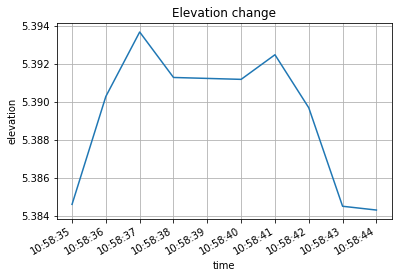

In [ ]:
df_csv.plot(x="dt", y="elev", title="Elevation change", grid=True, legend=False, xlabel="time", ylabel="elevation")

## Calculations with DataFrames and Series.

Average of a column (e.g. a Series)

In [ ]:
df_csv['east'].mean()

-97.47063333333332

Average of all columns.

In [ ]:
df_csv.mean(numeric_only=True)

east     -97.470633
north   -175.096833
elev       5.389122
dtype: float64

Detailed statistics on numerical columns.

In [ ]:
df_csv.describe()

,east,north,elev
count,9.000000,9.000000,9.000000
mean,-97.470633,-175.096833,5.389122
std,0.001410,0.001760,0.003678
min,-97.472000,-175.101100,5.384300
25%,-97.471700,-175.097200,5.384600
50%,-97.471000,-175.096400,5.390300
75%,-97.470100,-175.096100,5.391300
max,-97.467400,-175.095000,5.393700


Change to relative coordinates to the first values.

In [ ]:
df_csv['east'] -= df_csv['east'][0]
df_csv['north'] -= df_csv['north'][0]
df_csv['elev'] -= df_csv['elev'][0]
df_csv

,east,north,elev,dt
0,0.0000,0.0000,0.0000,2022-12-04 10:58:35
1,0.0003,0.0011,0.0057,2022-12-04 10:58:36
2,-0.0008,0.0007,0.0091,2022-12-04 10:58:37
3,-0.0016,0.0022,0.0067,2022-12-04 10:58:38
4,0.0030,-0.0039,0.0066,2022-12-04 10:58:40
5,-0.0013,-0.0002,0.0079,2022-12-04 10:58:41
6,-0.0006,0.0016,0.0051,2022-12-04 10:58:42
7,-0.0014,0.0008,-0.0001,2022-12-04 10:58:43
8,0.0003,0.0010,-0.0003,2022-12-04 10:58:44


Adding new column to DataFrame.

In [ ]:
df_csv['dist'] = (df_csv['east']**2 + df_csv['north']**2 + df_csv['elev']**2)**0.5
df_csv

,east,north,elev,dt,dist
0,0.0000,0.0000,0.0000,2022-12-04 10:58:35,0.000000
1,0.0003,0.0011,0.0057,2022-12-04 10:58:36,0.005813
2,-0.0008,0.0007,0.0091,2022-12-04 10:58:37,0.009162
3,-0.0016,0.0022,0.0067,2022-12-04 10:58:38,0.007231
4,0.0030,-0.0039,0.0066,2022-12-04 10:58:40,0.008232
5,-0.0013,-0.0002,0.0079,2022-12-04 10:58:41,0.008009
6,-0.0006,0.0016,0.0051,2022-12-04 10:58:42,0.005379
7,-0.0014,0.0008,-0.0001,2022-12-04 10:58:43,0.001616
8,0.0003,0.0010,-0.0003,2022-12-04 10:58:44,0.001086


## Selections from DataFrame.

Vertical selection

In [ ]:
df_csv[['dt', 'elev']]

,dt,elev
0,2022-12-04 10:58:35,0.0000
1,2022-12-04 10:58:36,0.0057
2,2022-12-04 10:58:37,0.0091
3,2022-12-04 10:58:38,0.0067
4,2022-12-04 10:58:40,0.0066
5,2022-12-04 10:58:41,0.0079
6,2022-12-04 10:58:42,0.0051
7,2022-12-04 10:58:43,-0.0001
8,2022-12-04 10:58:44,-0.0003


Horizontal selection

In [ ]:
from datetime import datetime
dat = datetime.strptime("2022-12-04 10:58:40", "%Y-%m-%d %H:%M:%S")
df_csv.loc[df_csv['dt'] > dat]
# alternative solution
df_csv[df_csv['dt'] > dat]
# more readable
df_csv.query("dt > @dat")

,east,north,elev,dt,dist
5,-0.0013,-0.0002,0.0079,2022-12-04 10:58:41,0.008009
6,-0.0006,0.0016,0.0051,2022-12-04 10:58:42,0.005379
7,-0.0014,0.0008,-0.0001,2022-12-04 10:58:43,0.001616
8,0.0003,0.0010,-0.0003,2022-12-04 10:58:44,0.001086


Plot multiple columns in a chart

<AxesSubplot:xlabel='dt'>

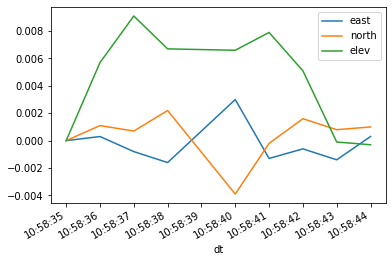

In [ ]:
df_csv.plot(x = "dt", y=["east", "north", "elev"])